In [1]:
import pandas as pd

In [2]:
proposition=pd.read_csv('Proposition.csv')

This file contains all transformed data except for proposition variable in its original format

In [3]:
proposition

,Numcust,TRB,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Primary,...,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS,Revenue
0,0.070379,-0.243790,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,-0.251197,2,...,1,2,1,1,2,3. Bronze,2,2,3,12000
1,0.177381,-0.199371,0.487501,0.381397,-0.270957,-0.235752,2.701543,-0.321304,-0.251197,2,...,1,2,1,1,2,3. Bronze,2,2,2,15000
2,0.070379,-0.243790,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,-0.251197,2,...,1,2,1,1,2,3. Bronze,2,2,1,12000
3,0.070379,-0.243790,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,0.298711,2,...,1,2,1,2,2,3. Bronze,2,2,3,12000
4,0.070379,-0.243790,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,0.298711,2,...,1,2,1,2,2,3. Bronze,2,2,2,12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55291,-0.143626,-0.322757,-0.246518,-0.262722,-0.058875,-0.007279,-0.504723,0.217131,-0.251197,1,...,2,1,2,1,1,1. Gold,3,1,2,40000
55292,-0.304130,-0.396788,-0.246518,-0.262722,-0.217937,-0.178633,-0.504723,-0.186695,-0.251197,1,...,2,1,2,1,1,1. Gold,3,1,1,10000
55293,0.070379,-0.224048,-0.246518,-0.262722,0.153207,0.221195,-0.504723,0.755567,0.298711,1,...,2,1,2,2,1,1. Gold,3,1,3,80000
55294,-0.143626,-0.322757,-0.246518,-0.262722,-0.058875,-0.007279,-0.504723,0.217131,0.023757,1,...,2,1,2,2,1,1. Gold,3,1,2,40000


In [4]:
# sort values by proposition and revenue
proposition= proposition.sort_values(by=['Proposition','Revenue'], ascending= False)

In [5]:
proposition.head()

,Numcust,TRB,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Primary,...,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS,Revenue
566,10.556609,4.109236,14.727464,12.877307,10.545234,11.416376,-0.504723,-0.321304,-0.251197,2,...,2,1,1,1,2,3. Bronze,2,5,1,306000
661,10.556609,4.109236,14.727464,12.877307,10.545234,11.416376,-0.504723,-0.321304,-0.251197,2,...,2,1,1,1,2,3. Bronze,2,4,2,306000
856,10.556609,4.109236,14.727464,12.877307,10.545234,11.416376,-0.504723,-0.321304,13.771468,2,...,2,1,1,2,2,3. Bronze,2,3,2,306000
953,10.556609,4.109236,14.727464,12.877307,10.545234,11.416376,-0.504723,-0.321304,13.771468,2,...,2,1,1,2,2,3. Bronze,2,3,1,306000
1140,10.556609,4.109236,14.727464,12.877307,10.545234,11.416376,-0.504723,-0.321304,-0.251197,2,...,2,1,1,1,2,3. Bronze,2,1,3,306000


In [8]:
proposition['Value']= proposition['Revenue'].cumsum()/proposition['Revenue'].sum()

In [9]:
proposition['customer_prop']= proposition['Numcust'].cumsum()/proposition["Numcust"].sum()
proposition['customer_prop']= proposition['customer_prop'].sort_values(ascending= False)

In [10]:
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

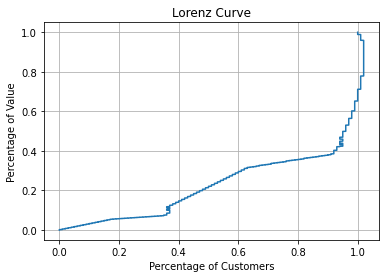

In [11]:
import matplotlib.pyplot as plt
 
x  = proposition["customer_prop"]
y = proposition["Value"]

plt.plot(round(x,2), y)
plt.plot()

plt.xlabel("Percentage of Customers")
plt.grid()
plt.ylabel("Percentage of Value")
plt.title("Lorenz Curve")

plt.show()

In [12]:
y=sorted(y)

In [13]:
x=sorted(x)

In [14]:
type(x)

list

In [15]:
x=np.array(x)

In [16]:
y=np.array(y)

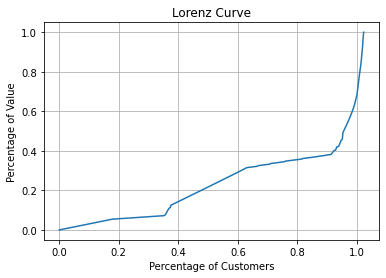

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
 
# x  = proposition["customer_prop"]
# y = proposition["Value"]

X_Y_Spline = make_interp_spline(x, y)

X_ = np.linspace(x.min(), x.max(), 500)

Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.plot()

plt.xlabel("Percentage of Customers")
plt.grid()
plt.ylabel("Percentage of Value")
plt.title("Lorenz Curve")

plt.show()

This curve shows the customer percentile and the revenue generated, breakdown table of each percentile and proposition is handwritten in notebook